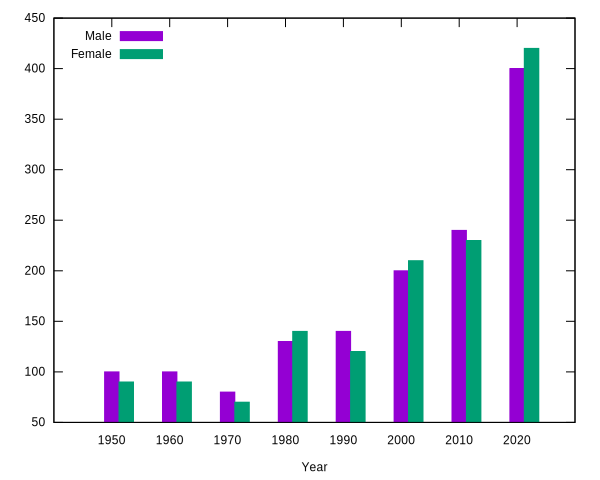

In [16]:
use Chart::Gnuplot;
use Chart::Gnuplot::Subset;
use File::Temp;

my ($filename, $filehandle);

# NOTE: Shouldn't remove both ENTER and LEAVE blocks. File::Temp's auto-unlink doesn't seem to work on jupyter.
ENTER {
  ($filename, $filehandle) = tempfile(:tempdir("/tmp"), :suffix(".svg"));
}

LEAVE {
  $filehandle.close;
  $filename.IO.unlink;
}

my $gnu = Chart::Gnuplot.new(:terminal("svg"), :filename($filename));

my @data = (q:to/EOF/).split("\n", :skip-empty)>>.split(" ", :skip-empty);
Year Male Female
1950 100 90
1960 100 90
1970 80 70
1980 130 140
1990 140 120
2000 200 210
2010 240 230
2020 400 420
EOF

my ($header, *@body) = @data;

$gnu.command("set style histogram clustered");
$gnu.legend(:left);
my AnyTicsTic @tics = (@body>>.[0]).pairs.map(-> (:key($pos), :value($year)) { %(:label($year), :pos($pos)) });
$gnu.xtics(:tics(@tics));
$gnu.xlabel(:label($header[0]));
$gnu.plot(:vertices(@body), :using([2]), :style("histogram"), :title($header[1]), :fill("solid 1.0"));
$gnu.plot(:vertices(@body), :using([3]), :style("histogram"), :title($header[2]), :fill("solid 1.0"));
$gnu.dispose;

$filehandle.lines[1..*].join("\n");